* **Firstly we load some libraries for this project like matplotlib, numpy and pandas**

In [15]:
%load_ext nb_black
from IPython.core.debugger import set_trace

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

plt.style.use(style="seaborn")
%matplotlib inline

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>


* **Read CSV File**(The csv file location depends upon sir pc location)


In [17]:
# shift + enter two times if any error!
df = pd.read_csv(
    f"C:/MLProject/IMDb movies.csv",
    encoding="ISO-8859-1",
    error_bad_lines=False,
)

<IPython.core.display.Javascript object>

**K - means**

K-means clustring is a clustring method that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest cluster.
The standard k-means algorithm is only applicable to numeric data and isn't directly applicable to categorical data for various reasons. The sample space for categorical data is discrete, an Euclidean distance function on such a space is not meanigful

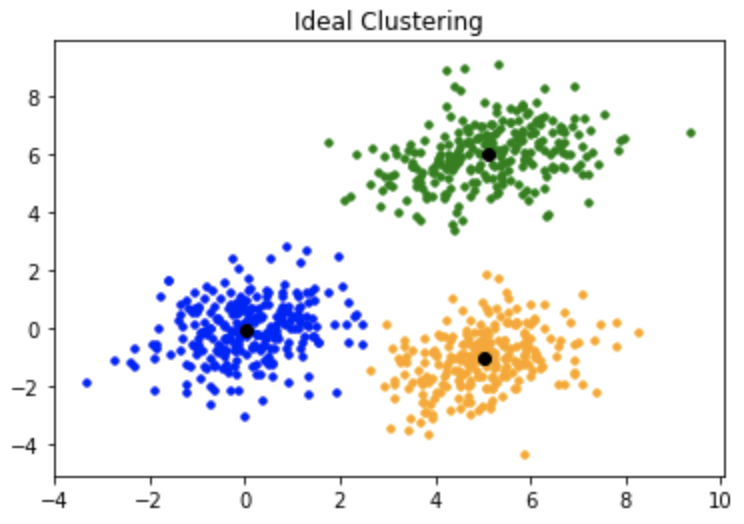


Initially these clusters will be set randomly beacue we are going to calculate Euclidean distance between each observation that means the algorithm is only applicable to numeric data only beacuse categorical data is discrete and therefore this Euclidean distance is not really meaningful so it would be easy if we make centriods it would be very easy if we know the number of centriods that are applicable to our problem. the problem is we are not given the no of centriods and its location so we need randaom centriods to start the observation. We repeat this procedure continously untill the centriod stop moving 


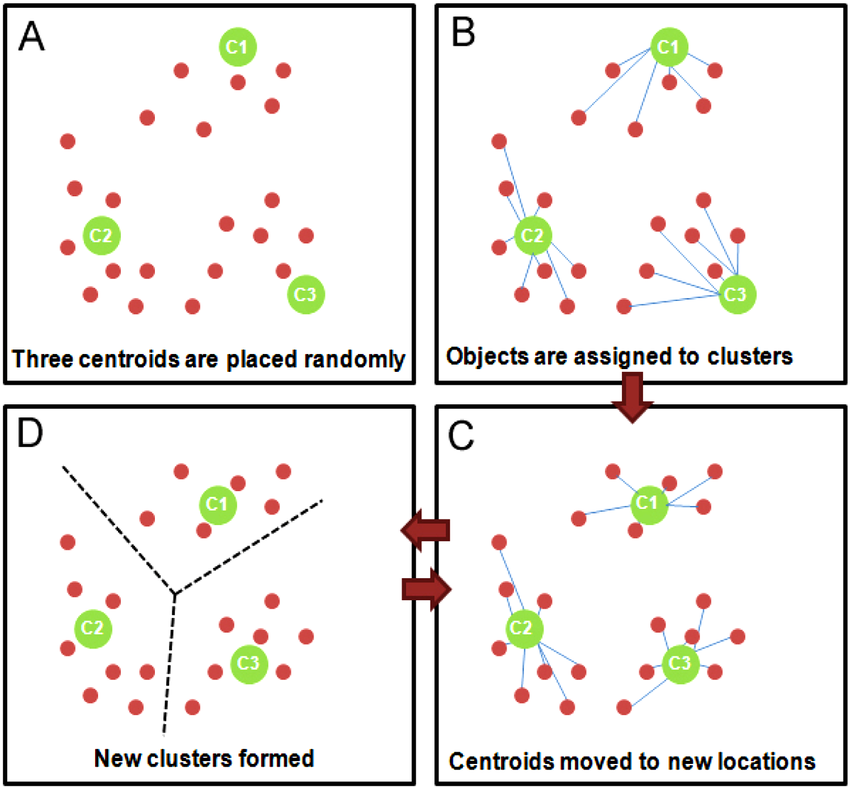


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>

In [8]:
df.head(2)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


<IPython.core.display.Javascript object>


* We can work on different features according to csv data


In [9]:
features = ["duration", "votes", "reviews_from_users"]
data = df[features].copy()
data.fillna(-999, inplace=True)
data = data.values
print(data)

[[  45.  154.    1.]
 [  70.  589.    7.]
 [  53.  188.    5.]
 ...
 [ 130.  265. -999.]
 [  98.  194. -999.]
 [  74.  102. -999.]]


<IPython.core.display.Javascript object>


* Input feature scale


In [10]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data)

[[-2.45420385 -0.17432862  0.13858782]
 [-1.34573909 -0.16620901  0.15611908]
 [-2.09949512 -0.17369398  0.15027533]
 ...
 [ 1.31457632 -0.17225672 -2.78329018]
 [-0.10425856 -0.17358199 -2.78329018]
 [-1.16838473 -0.17529924 -2.78329018]]


<IPython.core.display.Javascript object>


We don't know the information of dataset that's why we don't know how to set no of cluster to split this dataset. We need to find the optimal no of clusters.For that we can compute the model inertia means the distance each observation and it's centriods. K-means algorithms run n times and keep the model with its lowest inertia so the best no of clusters can be defined by the model that has lower inertia its no if the number of clusters equal to the number of observation then the inertia would 0. 


Wall time: 55.2 s


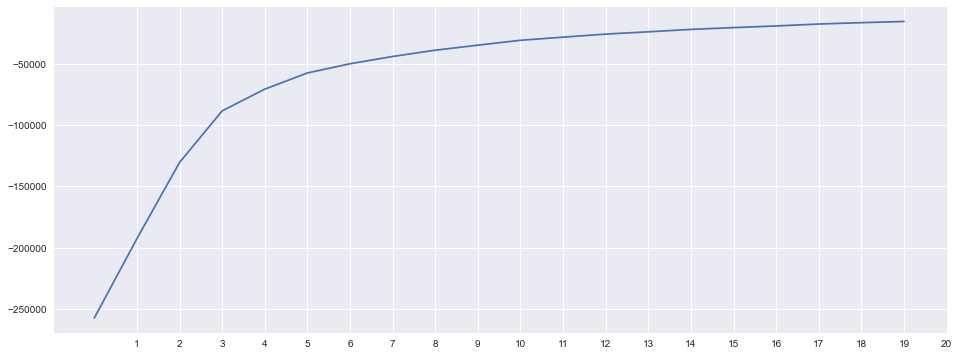

<IPython.core.display.Javascript object>

In [11]:
%%time
n_cluster = range(1,21)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_ = plt.xticks(n_cluster)


We plot the explained variation as a fuction of the number of clusters and pick the elbow of the curve as the number to use


In [12]:
%%time 
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4).fit_predict(data)
print(silhouette_score(data, kmeans))

0.5993819513349143
Wall time: 1min 53s


<IPython.core.display.Javascript object>

best no of clusters


In [13]:
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores = np.diff(dif_scores)
n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
print(n_clusters)

16


<IPython.core.display.Javascript object>

Check First Obervation

In [13]:
preds = KMeans(n_clusters=n_clusters).fit_predict(data)
print(f"Cluster first observation: {preds[0]}")

Cluster first observation: 8


<IPython.core.display.Javascript object>

In [14]:
df = pd.DataFrame(df)
df["cluster"] = preds

outliers = [
    j
    for j in zip(
        df["cluster"].value_counts().iloc[-2:].index,
        df["cluster"].value_counts().iloc[-2:].values,
    )
]

<IPython.core.display.Javascript object>

In [15]:
df["cluster"].value_counts()

1     28559
15    19602
0     10969
8      8739
5      6190
10     4965
4      2248
9      1652
2      1392
16      820
11      315
13      149
6        93
3        86
7        56
14       13
12        7
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# First item is tuple the second is no of observation
outliers

[(14, 13), (12, 7)]

<IPython.core.display.Javascript object>

In [17]:
clusters = [
    j[0]
    for j in outliers
    if j[1] < np.quantile(df["cluster"].value_counts().values, 0.10)
]

<IPython.core.display.Javascript object>

In [18]:
clusters

[14, 12]

<IPython.core.display.Javascript object>

In [19]:
for c in clusters:
    print(df[df.cluster == c][features])

       duration    votes  reviews_from_users
15528       175  1572674              3977.0
28066       142  1755490              2416.0
28381       154  1780147              3058.0
28453       142  2278845              8232.0
31279       178  1619920              5392.0
32229       136  1632315              4310.0
32487       139  1807440              3758.0
34127       201  1604280              3718.0
34128       179  1449778              2575.0
48078       152  2241615              6938.0
50294       169  1449256              4100.0
57234       164  1480582              3004.0
57475       148  2002816              3927.0
       duration   votes  reviews_from_users
67676       152  547797              6718.0
67677       141  347274              7553.0
73863       123  422676              7207.0
73865       181  754786              8869.0
81897       161  507214              5166.0
82239       122  855097             10472.0
83783       101  101686              7639.0


<IPython.core.display.Javascript object>

In [20]:
df[features].describe()

,duration,votes,reviews_from_users
count,85855.000000,8.585500e+04,78258.000000
mean,100.351418,9.493490e+03,46.040826
std,22.553848,5.357436e+04,178.511411
min,41.000000,9.900000e+01,1.000000
25%,88.000000,2.050000e+02,4.000000
50%,96.000000,4.840000e+02,9.000000
75%,108.000000,1.766500e+03,27.000000
max,808.000000,2.278845e+06,10472.000000


<IPython.core.display.Javascript object>

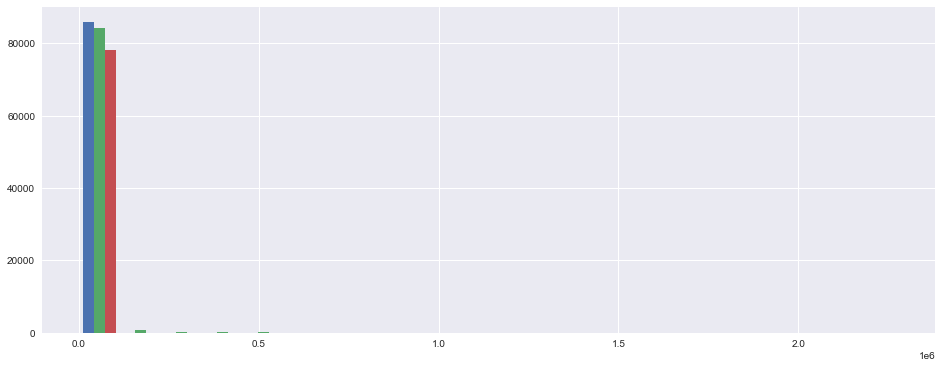

<IPython.core.display.Javascript object>

In [21]:
f = plt.figure(1, figsize=(16, 6))
_ = plt.hist(df[features].values, bins=20)

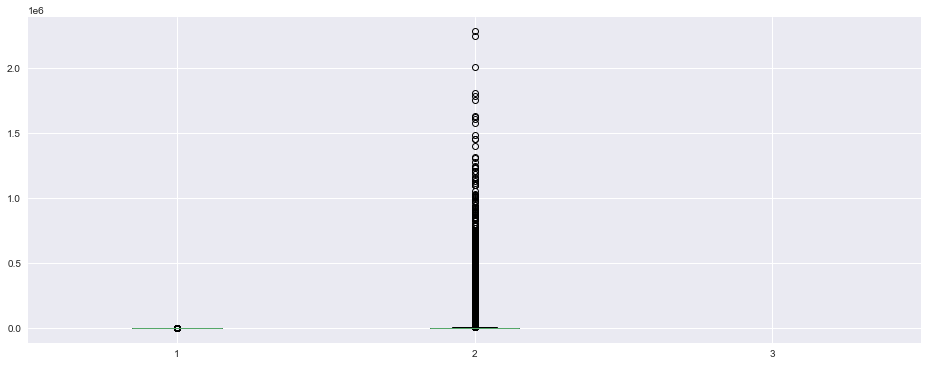

<IPython.core.display.Javascript object>

In [22]:
f = plt.figure(1, figsize=(16, 6))
_ = plt.boxplot(df[features].values)

In [18]:
pwd


'C:\\Users\\Saad'

<IPython.core.display.Javascript object>